In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the depression dataset
dataset_path = './Depression Dataset.csv'
dataset = pd.read_csv(dataset_path)
print(f"Dataset loaded successfully! Shape: {dataset.shape}")
dataset.head()

Dataset loaded successfully! Shape: (604, 31)


,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1


In [4]:
# Check for missing values
if dataset.isnull().sum().sum() > 0:
    print("Missing values detected.")
else:
    print("No missing values detected.")

# Check for inconsistent entries
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"{column} - Unique Values: {unique_values}")

No missing values detected.
AGERNG - Unique Values: ['26-30' '21-25' '16-20' '31-35' '46-50' '41-45' '56-60' '36-40' '61+'
 '51-55']
GENDER - Unique Values: ['Female' 'Male']
EDU - Unique Values: ['Post Graduate' 'HSC' 'Graduate' 'SSC']
PROF - Unique Values: ['Unemployed' 'Service holder (Private)' 'Student'
 'Service holder (Government)' 'Other' 'Businessman']
MARSTS - Unique Values: ['Unmarried' 'Married' 'Divorced']
RESDPL - Unique Values: ['Town' 'City' 'Village']
LIVWTH - Unique Values: ['With Family' 'Without Family']
ENVSAT - Unique Values: ['Yes' 'No']
POSSAT - Unique Values: ['Yes' 'No']
FINSTR - Unique Values: ['No' 'Yes']
DEBT - Unique Values: ['No' 'Yes']
PHYEX - Unique Values: ['Sometimes' 'Never' 'Regularly']
SMOKE - Unique Values: ['No' 'Yes']
DRINK - Unique Values: ['Yes' 'No']
ILLNESS - Unique Values: ['No' 'Yes']
PREMED - Unique Values: ['No' 'Yes']
EATDIS - Unique Values: ['No' 'Yes']
AVGSLP - Unique Values: ['More than 8 hours' '6 hours' '8 hours' '7 hours' '5 hours

In [3]:
# Convert all columns to categorical data type
for column in dataset.columns:
    dataset[column] = dataset[column].astype('category')

In [4]:
# Separate features and target variable
X = dataset.drop(columns=['DEPRESSED'])  # Assuming 'DEPRESSED' is the target column
y = dataset['DEPRESSED']

In [5]:
# Convert categorical columns to numerical using category codes
X = X.apply(lambda col: col.cat.codes)
y = y.cat.codes

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the Categorical Naive Bayes classifier
nb_classifier = CategoricalNB()

In [8]:
# Train the classifier
nb_classifier.fit(X_train, y_train)

CategoricalNB()

In [9]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [11]:
# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 88.43%
Precision: 0.97
Recall: 0.84
F1-Score: 0.90
Confusion Matrix:
[[42  2]
 [12 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.97      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.88       121
weighted avg       0.90      0.88      0.89       121



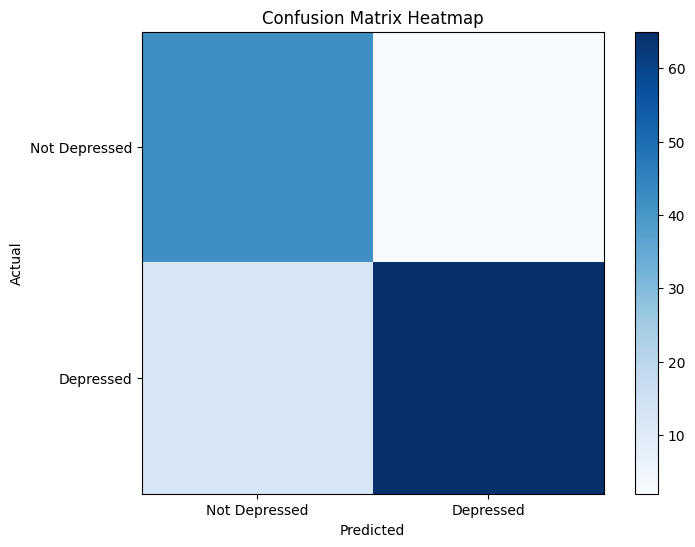

In [12]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.colorbar()
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.yticks([0, 1], ['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()